In [3]:
from mppi import Utilities as U, Parsers as P
import matplotlib.pyplot as plt
import numpy as np

# Plots

The notebook collects the plots used in the paper

## KS Bands and DOS

In [6]:
bands_file = 'QE_bands/bands.save/data-file-schema.xml'
dos_file = 'NSCF/bnds_16-kpoints_8.save/data-file-schema.xml'
dosKpump_file = 'NSCF/bnds_16-kpoints_100-sampling_random_close_Gamma.save/data-file-schema.xml'

hsp = U.high_sym_fcc

In [7]:
bands = U.BandStructure.from_Pw(bands_file,hsp,set_gap=1.42)

Apply a scissor of 0.5456147560258169 eV


In [31]:
dos = U.Dos.from_Pw(dos_file,set_gap=1.42,label='dos',eta=0.1,minVal=-4,maxVal=4)
dos.append_fromPw(dosKpump_file,set_gap=1.42,label='dosKpump',eta=0.1,minVal=-4,maxVal=4)

Apply a scissor of 0.5456147446580722 eV
Apply a scissor of 0.5456147497318283 eV


In [21]:
hs_positions = bands.get_high_sym_positions()
hs_positions

(['L', 'G', 'G', 'K', 'X'],
 [0.0,
  0.8660254037844385,
  4.28023896615753,
  2.866025403784435,
  1.8660254037844377])

In [22]:
kspan = 0.05 #in unit of 2pi/alat
k0 = hs_positions[1][1]
k0

0.8660254037844385

(0.0, 1.864)

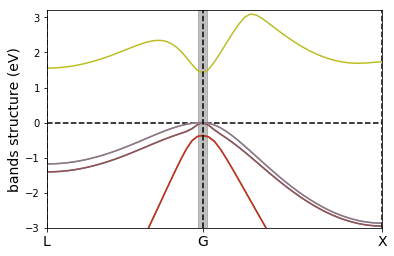

In [23]:
bands.plot(plt,selection=[i for i in range(0,9)])
ax = plt.axes()
ax.axvspan(k0-kspan/2, k0+kspan/2, alpha=0.5, color='gray')
plt.ylim(-3,3.2)
plt.ylabel('bands structure (eV)',size=14)
plt.hlines(0.,0.,2,linestyles='--')
plt.xlim(0.,1.864)

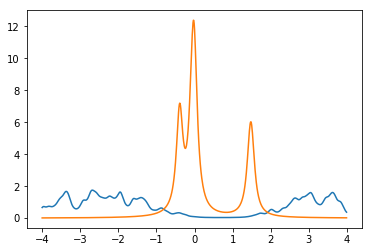

In [32]:
dos.plot(plt)

## Spin magnetization

We compare the spin magnetization obtained with various sampling (and values of the dephasing) in the same 
region of the k space close to $\Gamma$.

In [317]:
def files_from_path(path):
    import os
    listdir= os.listdir(path)
    ofiles = []
    for file in listdir:
        if 'o-' in file:
            ofiles.append(os.path.join(path,file))
    return ofiles

In [367]:
path_50 = 'RT_k50/FixSymm/dephase_0.002-freq_1.5-int_1000.0-simTime_10000'
path_100 = 'RT_k100/FixSymm/dephase_0.002-freq_1.5-int_1000.0-simTime_10000'
path_50_lowdeph = 'RT_k50/FixSymm/dephase_0.0001-freq_1.5-int_1000.0-simTime_10000'
path_50_longpulse = 'RT_k50/FixSymm/dephase_0.002-freq_1.5-int_1000.0-simTime_10000-fwhm_200'
#path_100_large = 'RT_k100_large_volume/FixSymm/dephase_0.002-freq_1.55-int_1000.0-simTime_6000'

In [368]:
data_50 = P.YamboParser(files_from_path(path_50))
data_100 = P.YamboParser(files_from_path(path_100))
data_50_lowdeph = P.YamboParser(files_from_path(path_50_lowdeph))
data_50_longpulse = P.YamboParser(files_from_path(path_50_longpulse))
#data_100_large = P.YamboParser(files_from_path(path_100_large))

Plot the carriers and the field

In [372]:
carr_50 = data_50['carriers']
carr_100 = data_100['carriers']
field_50 = data_50['external_field']

(0, 600)

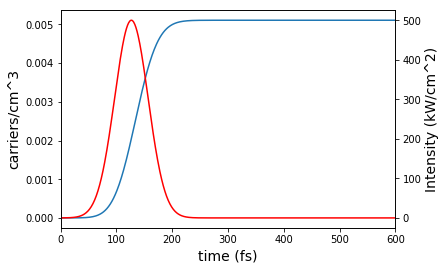

In [383]:
fig, ax1 = plt.subplots()

ax1.plot(carr_50['time'],carr_50['dne'],label='carriers')
#plt.plot(carr_100['time'],carr_100['dne'])
ax1.set_xlabel('time (fs)',size=14)
ax1.set_ylabel('carriers/cm^3',size=14)

ax2 = ax1.twinx()
ax2.plot(field_50['time'],field_50['Intensity'],label='Intensity',color='red')
ax2.set_ylabel('Intensity (kW/cm^2)',size=14)
plt.xlim(0,600)


In [384]:
spin_50 = data_50['spin_magnetization']
spin_100 = data_100['spin_magnetization']
spin_50_lowdeph = data_50_lowdeph['spin_magnetization']
spin_50_longpulse = data_50_longpulse['spin_magnetization']
#spin_100_large = data_100_large['spin_magnetization']

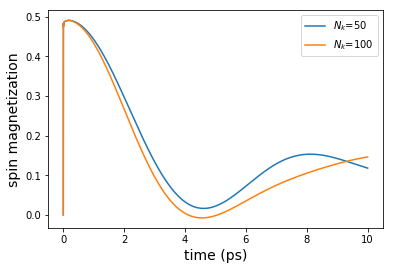

In [393]:
plt.plot(spin_50['time']*1e-3,spin_50['Mc_z'],label='$N_k$=50')
plt.plot(spin_100['time']*1e-3,spin_100['Mc_z'],label='$N_k$=100')
#plt.plot(spin_50_lowdeph['time'],spin_50_lowdeph['Mc_z'],label='50_lowdeph')
#plt.plot(spin_100_large['time'],spin_100_large['Mc_z'],label='100_large')
plt.xlabel('time (ps)',size=14)
plt.ylabel('spin magnetization',size=14)
plt.legend()

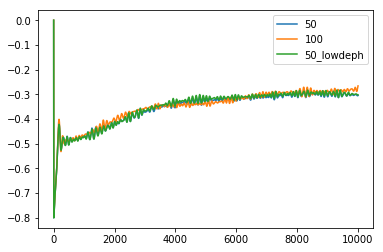

In [322]:
plt.plot(spin_50['time'],spin_50['Mv_z'],label='50')
plt.plot(spin_100['time'],spin_100['Mv_z'],label='100')
plt.plot(spin_50_lowdeph['time'],spin_50_lowdeph['Mv_z'],label='50_lowdeph')
#plt.plot(spin_100_large['time'],spin_100_large['Mv_z'],label='100')
plt.legend()

Comparison of the results with two field of different fwhm

In [337]:
field_50 = data_50['external_field']
field_50_longpulse = data_50_longpulse['external_field']

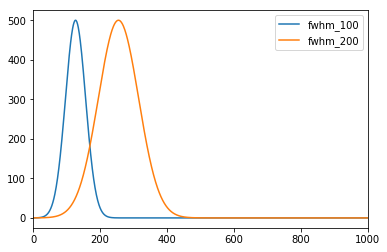

In [339]:
plt.plot(field_50['time'],field_50['Intensity'],label='fwhm_100')
plt.plot(field_50_longpulse['time'],field_50_longpulse['Intensity'],label='fwhm_200')
plt.xlim(0,1000)
plt.legend()

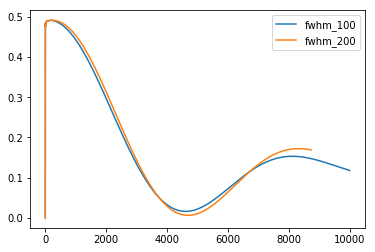

In [360]:
plt.plot(spin_50['time'],spin_50['Mc_z'],label='fwhm_100')
plt.plot(spin_50_longpulse['time'],spin_50_longpulse['Mc_z'],label='fwhm_200')

plt.legend()

## Sum of oscillatory functions

In [312]:
sim_time = 20000 # in fs
t = np.arange(0.,sim_time)

In [313]:
r_50 = P.PwParser('NSCF/bnds_16-kpoints_50-sampling_random_close_Gamma.save/data-file-schema.xml')
r_100 = P.PwParser('NSCF/bnds_16-kpoints_100-sampling_random_close_Gamma.save/data-file-schema.xml')
r_200 = P.PwParser('NSCF/bnds_16-kpoints_200-sampling_random_close_Gamma.save/data-file-schema.xml')

transitions_50 = 1e3*r_50.get_transitions(set_gap=1.42,initial=[8,9],final=[8,9])
transitions_100 = 1e3*r_100.get_transitions(set_gap=1.42,initial=[8,9],final=[8,9])
transitions_200 = 1e3*r_200.get_transitions(set_gap=1.42,initial=[8,9],final=[8,9])

Parse file : NSCF/bnds_16-kpoints_50-sampling_random_close_Gamma.save/data-file-schema.xml
Parse file : NSCF/bnds_16-kpoints_100-sampling_random_close_Gamma.save/data-file-schema.xml
Parse file : NSCF/bnds_16-kpoints_200-sampling_random_close_Gamma.save/data-file-schema.xml
Apply a scissor of 0.5456147497318283 eV
Apply a scissor of 0.5456147497318283 eV
Apply a scissor of 0.5456147497318283 eV


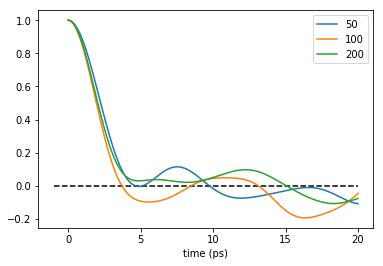

In [315]:
f_sum = 0.
for e in transitions_50:
    #print(e[0])
    nu = e[0]/(U.Planck_ev_ps*1e6)
    f_sum += np.cos(2*np.pi*nu*t)   
plt.plot(t/1000,f_sum/50,label=50)

f_sum = 0.
for e in transitions_100:
    #print(e[0])
    nu = e[0]/(U.Planck_ev_ps*1e6)
    f_sum += np.cos(2*np.pi*nu*t)
plt.plot(t/1000,f_sum/100,label=100)

f_sum = 0.
for e in transitions_200:
    #print(e[0])
    nu = e[0]/(U.Planck_ev_ps*1e6)
    f_sum += np.cos(2*np.pi*nu*t)
plt.plot(t/1000,f_sum/200,label=200)


plt.hlines(0,-1,20,linestyles='--')
plt.xlabel('time (ps)')
plt.legend()
plt.show()

__We observe a kpoint sampling induced damping in the time behavior of the magnetization.__